# Baseline model

In [34]:
from utils import get_data

X_train, X_test, y_train, y_test, y = get_data()


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define column names for categorical and numeric columns
columns_to_drop = ['CustomerId']
categorical_columns = ['Gender', 'Geography']
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary']

# Create the column preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(categories='auto', drop="first"), categorical_columns),
        ('std_scaler', StandardScaler(), numeric_columns)
    ])

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_reg', LogisticRegression())
])

# Fit the pipeline to the data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Geography']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])])),
                ('log_reg', LogisticRegression())])

In [36]:
# Classes
pipe[:-1].get_feature_names_out()

array(['ohe__Gender_Male', 'ohe__Geography_Germany',
       'ohe__Geography_Spain', 'std_scaler__CreditScore',
       'std_scaler__Age', 'std_scaler__Tenure', 'std_scaler__Balance',
       'std_scaler__NumOfProducts', 'std_scaler__HasCrCard',
       'std_scaler__IsActiveMember', 'std_scaler__EstimatedSalary'],
      dtype=object)

In [37]:
# Make predictions
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)

Accuracy:  0.8334595691822947
ROC AUC:  0.6680546608936434
Precision/Recall AUC:  0.6680546608936434
Confusion matrix:  [[24847  1176]
 [ 4321  2663]]


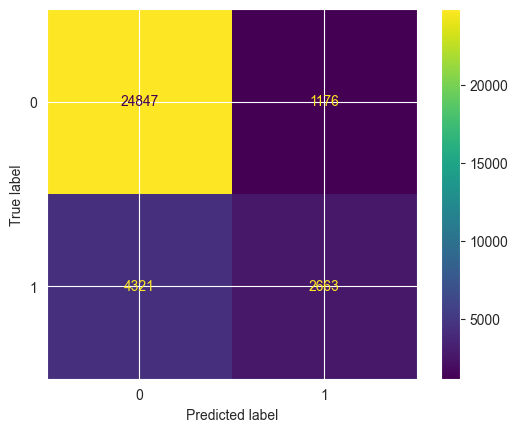

Done saving data!


In [38]:
import utils
import importlib
importlib.reload(utils)

utils.report_data('Logistic Regression', y, y_test, y_pred, y_pred_proba, pipe.classes_)